In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
X_train = np.loadtxt('input.csv',delimiter=',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [3]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [4]:
X_train = X_train.reshape(len(X_train),100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test),100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [5]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [38]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [7]:
X_train = X_train.reshape(len(X_train),100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test),100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

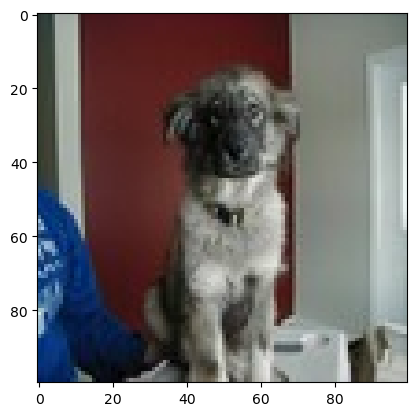

In [8]:
idx = random .randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model Creation

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [28]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
32/32 [==============================] - 8s 258ms/step - loss: 0.0317 - accuracy: 0.9975
Epoch 2/10
32/32 [==============================] - 9s 270ms/step - loss: 0.0244 - accuracy: 0.9965
Epoch 3/10
32/32 [==============================] - 9s 283ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 9s 287ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 5/10
32/32 [==============================] - 10s 318ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 6/10
32/32 [==============================] - 13s 403ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 7/10
32/32 [==============================] - 11s 328ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 11s 344ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 10s 302ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 10s 319ms/step - loss: 0.0031 - accuracy: 

In [29]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 37ms/step - loss: 1.6634 - accuracy: 0.6825


[1.6633588075637817, 0.6825000047683716]

## Making Predictions

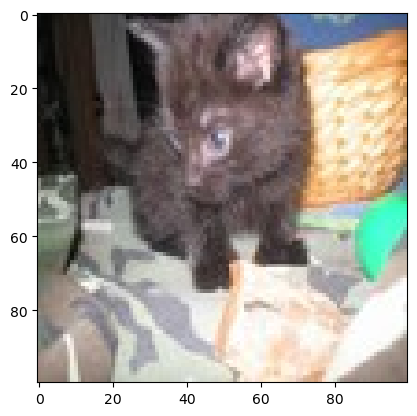

1/1 [==============================] - 0s 37ms/step
Our models says it is a:  Dog


In [58]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5
if (y_pred == 0):
    pred = 'Dog'
else:
    pred = 'Cat'
print("Our models says it is a: ",pred)